### Time Series Analysis

In [1]:
#Importing the necessary libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

**Reading the dataset**

In [2]:
df = pd.read_excel("Datasets/Superstore.xls")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Time series analysis and forecasting for furniture sales

In [3]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


### Data Preprocessing

For visualizing furniture sales time series data, we will only be using two columns - 'Order Date' and 'Sales' and for this purpose, we will be sorting the data as per the order date and then converting it into index. After that we will use the averages daily sales value for that month instead because the current datetime data can be tricky to work with, and now we are using the start of each month as the timestamp.

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 
        'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 
        'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Order Date    0
Sales         0
dtype: int64

In [5]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [6]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [7]:
#Resampling furniture sales by year
y = furniture['Sales'].resample('MS').mean()
y['2015']

Order Date
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
Freq: MS, Name: Sales, dtype: float64

### Visualizing the Time Series Data

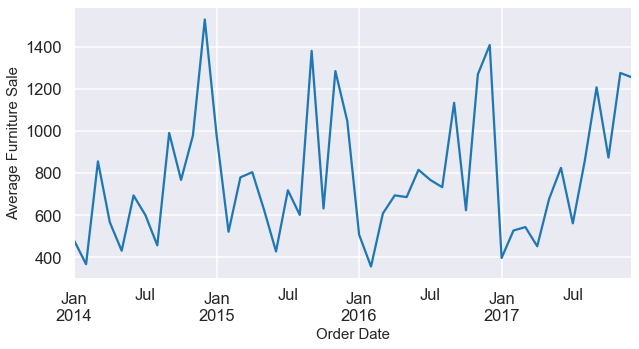

In [8]:
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
y.plot(figsize=(10, 5))
plt.ylabel("Average Furniture Sale",size=15)
plt.xlabel("Order Date",size=15)
plt.show()

**Comments:** 

- The visualized time-series data shows a seasonal pattern: sales are always low at the beginning of the year and high at the end of the year. 
- There is an upward trend every year with a couple of dips in the mid of the year. 
- The peak sales are in the month of January in the year 2015 and then a sudden plummet mid-year.

### Time Series Decomposition

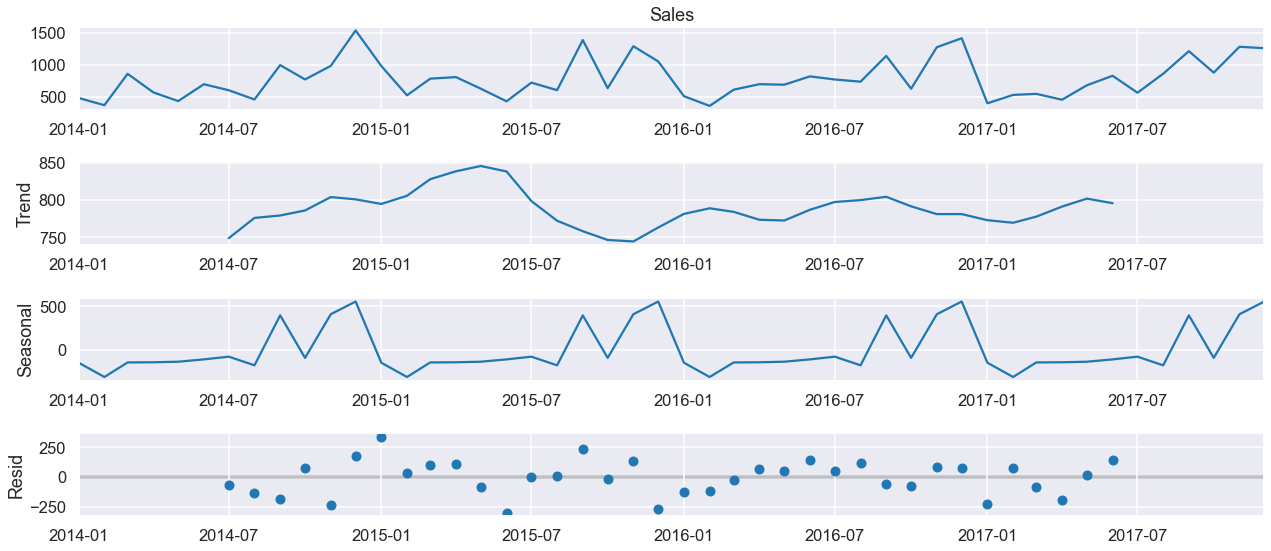

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The decomposition method allows us to decompose our time series into three distinct components: trend, seasonality, and noise. The above plot shows an unstable trend in the sales of furniture.

### Time series forecasting with ARIMA

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [11]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [12]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [13]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:780.0990452246119
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.27028999297056
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:826.0280960980306
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.24882803673495
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758104


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2729.0726182688663
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091676
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673041


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.55912673338594
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4020.6534058603174
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769277646
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576530939
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1498.4516809127028
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.96712281714713


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:620.2474727835848
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.91132002150556
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176709452
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2606.199149573252
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548483838
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.5806231718417
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774398126
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2780.306655944331
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684169856
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621506588
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1524.4537095482494
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751651925
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935395


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1067.8093346123774
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750656055
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921875116
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442579175
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1269080.5363280233
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3637985658455
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.3422194967701
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.576332407048
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2538.1595470009124
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:304.37537863898984
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188293357
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1857.0083065969122
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281135
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611614424
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036585859474
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2018.711591642327
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901312144
ARI

The ideal parametes were found out to be - pdq combo of (1,1,1) and the ideal seasonal pdq combo of (0,1,1,12) which gave an overall low Akaike Info Criterion (AIC) score of 281.38. We will thus fit another model with those parameters.

In [14]:
#Fitting the model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -136.694
Date:                            Mon, 26 Jul 2021   AIC                            281.387
Time:                                    12:52:18   BIC                            285.565
Sample:                                01-01-2014   HQIC                           282.294
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0953      0.310     -0.307      0.759      -0.703       0.513
ma.L1         -1.0000      0.414   

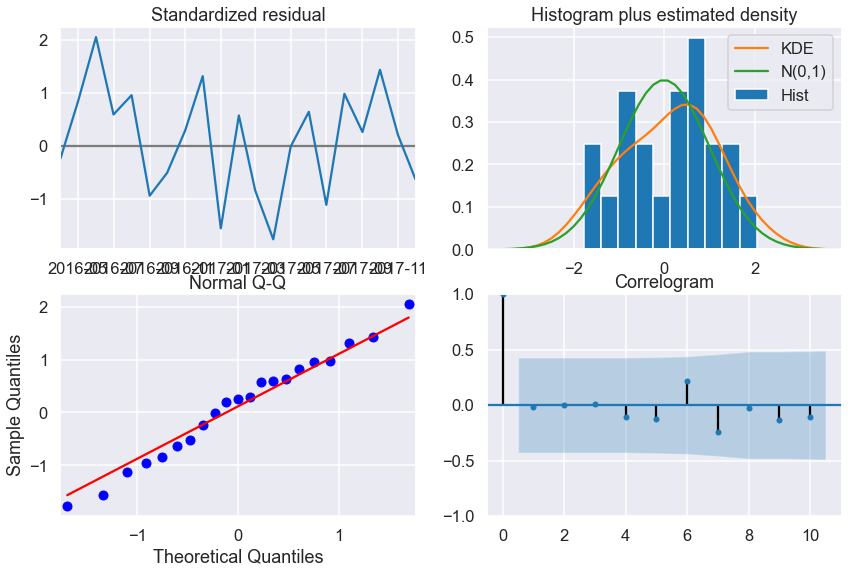

In [15]:
#Model diagnostics to investigate any unusual behavior
results.plot_diagnostics(figsize=(14,9))
plt.show()

The model diagnostics suggests that the model residuals are approximately normally distributed.

### Validating Forecasts

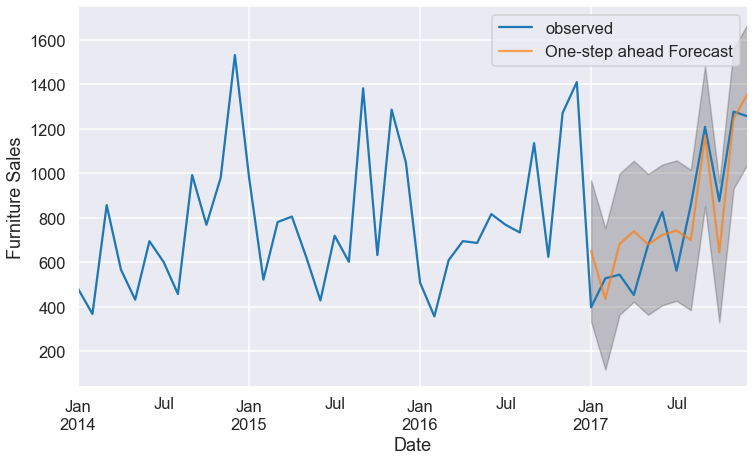

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(12, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starting from the beginning of the year and seasonal changes toward the end of the year.

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25665.13


In [19]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.2


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within a range of 160.2 values of the real sales.

### Visualizing Forecasts

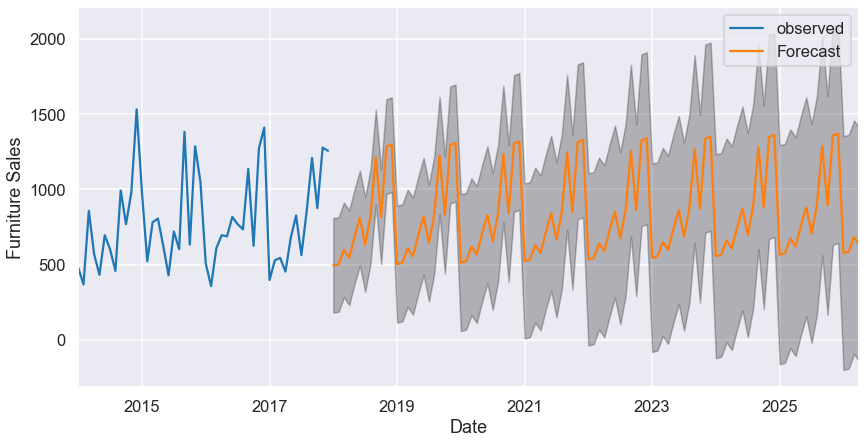

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The above plot again depicts similar annual trends and seasonality in the sales of furniture.

**Comparing Time Series of Furniture with other categories**

In [22]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

### Time Series of Furniture vs. Office Supplies

In [27]:
office = df.loc[df['Category'] == 'Office Supplies']

In [28]:
office.drop(cols, axis=1, inplace=True)

office = office.sort_values('Order Date')

office.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Order Date    0
Sales         0
dtype: int64

In [29]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [30]:
y_off = office['Sales'].resample('MS').mean()

In [31]:
furniture = pd.DataFrame({'Order Date':y.index, 'Sales':y.values})
office = pd.DataFrame({'Order Date': y_off.index, 'Sales': y_off.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


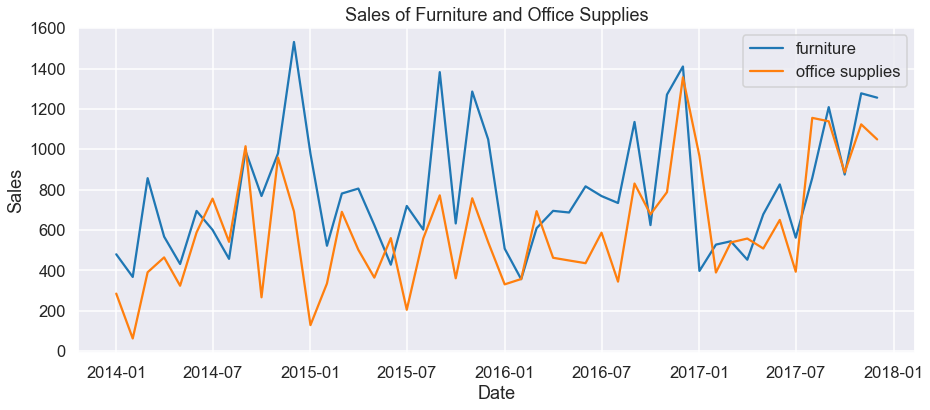

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(store['Order Date'], store['furniture_sales'], label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

**Conclusion:** It has been observed that sales of furniture and office supplies shared a similar seasonal pattern. The sales of both categories is low at th start of the year. Seemingly, summer time is quiet for office supplies too. In addition, average daily sales for furniture is higher than that of office supplies for most months. This is understandable, as the value of furniture should be much higher than that of office supplies. Occasionally, office supplies passed furniture on average daily sales. 

### Time Series of Furniture vs. Technology

In [37]:
tech = df.loc[df['Category'] == 'Technology']

In [38]:
tech.drop(cols, axis=1, inplace=True)

tech = tech.sort_values('Order Date')

tech.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Order Date    0
Sales         0
dtype: int64

In [39]:
tech = tech.groupby('Order Date')['Sales'].sum().reset_index()
tech = tech.set_index('Order Date')
tech.head()

,Sales
Order Date,
2014-01-06,1147.94
2014-01-09,31.20
2014-01-13,646.74
2014-01-15,149.95
2014-01-16,124.20


In [41]:
y_tech = tech['Sales'].resample('MS').mean()

In [42]:
tech = pd.DataFrame({'Order Date': y_tech.index, 'Sales': y_tech.values})
store1 = furniture.merge(tech, how='inner', on='Order Date')
store1.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'technology_sales'}, inplace=True)
store1.head()

,Order Date,furniture_sales,technology_sales
0,2014-01-01,480.194231,449.041429
1,2014-02-01,367.931600,229.787143
2,2014-03-01,857.291529,2031.948375
3,2014-04-01,567.488357,613.028933
4,2014-05-01,432.049188,564.698588


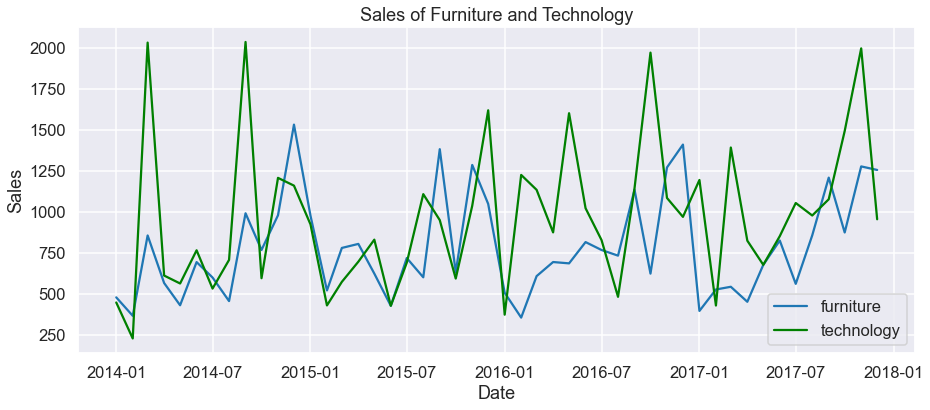

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(store1['Order Date'], store1['furniture_sales'], label = 'furniture')
plt.plot(store1['Order Date'], store1['technology_sales'], label = 'technology',c='g')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Technology')
plt.legend();

**Conclusion:** The sales of technology seem to be higher than furniture but with the same trend as that observed in office supplies and furniture.